In [239]:
__author__ = 'fbb'
import pylab as pl
import pandas as pd
import os
import json

s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [240]:
dataset = pd.read_csv(os.getenv("PUI2015")+"/FDNY_Line_Of_Duty_Deaths.csv")
dataset.head()


,Rank,Name,Unit,Date
0,FIREFIGHTER,THOMAS J. CONNOLLY,LADDER 28,"April 10, 1924"
1,FIREFIGHTER,JOSEPH P. AHERN,ENGINE 48,"April 10, 1934"
2,FIREFIGHTER,JOHN T. RYNN,ENGINE 89,"April 10, 1948"
3,FIREFIGHTER,DENIS J. CORRIDAN,ENGINE 324,"April 10, 1952"
4,FIREFIGHTER,JAMES J. MAINE,ENGINE 156,"April 10, 1969"


converting dates to datetime

In [241]:
pd.to_datetime(dataset.Date)

0               1924-04-10
1               1934-04-10
2               1948-04-10
3               1952-04-10
4               1969-04-10
5      1896-04-01 00:00:00
6               1917-04-12
7               1917-04-12
8               1901-04-14
9               1927-04-14
10              1965-04-14
11              1977-04-15
12     1868-04-16 00:00:00
13              1916-04-16
14              2012-04-16
15              1939-04-17
16              1957-04-17
17              1968-04-17
18              1924-04-18
19              2002-04-18
20              1930-04-19
21              1945-04-19
22              1945-04-20
23              1970-04-20
24              1951-04-22
25              1910-04-23
26              2005-04-23
27              1905-04-25
28              1912-04-25
29              1935-04-26
               ...        
1139            1921-09-18
1140            1969-09-19
1141            1963-09-02
1142            1945-09-22
1143            1953-09-22
1144            1960-09-22
1

In [242]:
#to remove the hours i apply a function to my converter 
#which extracts the date only from the new datetime object
dataset.Date = pd.to_datetime(dataset.Date).apply( lambda x: x.date() )
dataset.Date[:10]

0    1924-04-10
1    1934-04-10
2    1948-04-10
3    1952-04-10
4    1969-04-10
5    1896-04-01
6    1917-04-12
7    1917-04-12
8    1901-04-14
9    1927-04-14
Name: Date, dtype: object

#NOTE: for now i have a series of timestamps: this is NOT a timeseries! i have to bin it in time intergals to have a timeseries

##a time series is something as a sunction of time. by binning these data i have counts of deaths as a function of time. I can keep them at the day level.

(-20, 350.0)

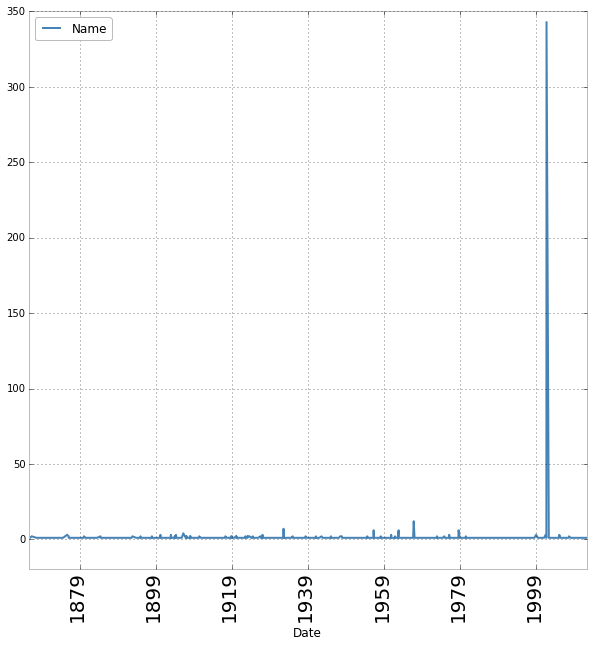

In [243]:
FSNYts = dataset[['Date', 'Name']].groupby('Date').count()#.agg('count')
ax = FSNYts.plot(figsize=(10,10))
pl.xticks(rotation=90, fontsize=20)
pl.ylim(-20,pl.ylim()[1])

##because all data are scruncehd up on the x axis i am going to log space for visualization purposes

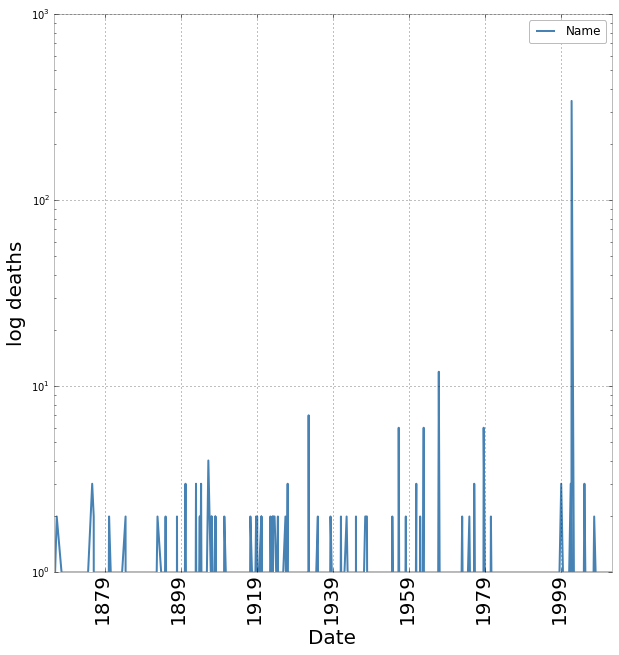

In [244]:
FSNYts = dataset[['Date', 'Name']].groupby('Date').count()#.agg('count')


ax = FSNYts.plot(logy=True, figsize=(10,10))
pl.xticks(rotation=90, fontsize=20)

pl.ylabel("log deaths", fontsize=20)
pl.xlabel("Date", fontsize=20)

#The mean and stardand deviation of the time series can be used to set a 3-sigma threshold
##every value that is more then 3 sigma's away from the mean can be flaged as an event

In [245]:

print FSNYts['Name'].mean(), FSNYts['Name'].std()
thresholds = [FSNYts['Name'].mean() + 3*FSNYts['Name'].std(), 
              FSNYts['Name'].mean() - 3*FSNYts['Name'].std()]
print thresholds
print min(FSNYts.index)

1.59481582538 12.6439611874
[39.526699387563959, -36.337067736813616]
1865-08-24


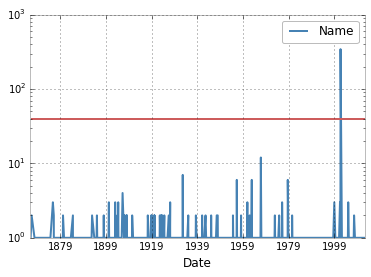

In [246]:
ax = FSNYts.plot(logy=True)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]])


In [247]:
FSNYts.loc[(FSNYts.Name>thresholds[0])]

,Name
Date,
2001-09-11,343


In [248]:
FSNYts.loc[(FSNYts.Name>thresholds[0])]=NaN

1.12841530055 0.649032703124
[3.0755134099186496, -0.81868280882575339]
1865-08-24


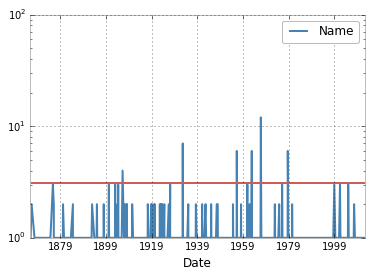

In [250]:
print FSNYts['Name'].mean(), FSNYts['Name'].std()
thresholds = [FSNYts['Name'].mean() + 3*FSNYts['Name'].std(), 
              FSNYts['Name'].mean() - 3*FSNYts['Name'].std()]
print thresholds
print min(FSNYts.index)
ax = FSNYts.plot(logy=True)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]])


In [255]:
FSNYts.loc[(FSNYts.Name>thresholds[0])]

,Name
Date,
1906-03-26,4
1932-08-01,7
1956-04-04,6
1962-10-26,6
1966-10-17,12
1978-08-02,6


["http://www.nytimes.com/2006/10/17/nyregion/17fire.html?pagewanted=all&_r=0"]